In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
import seaborn as sns

In [4]:
data_2019 = pd.read_csv('2019_statcast_data_final.csv')
data_2018 = pd.read_csv('2018_statcast_data_final.csv')
data_2017 = pd.read_csv('2017_statcast_data_final.csv')
data_2016 = pd.read_csv('2016_statcast_data_final.csv')
data_2015 = pd.read_csv('2015_statcast_data_final.csv')

# 2019

In [5]:
data_2019['launch_angle_avg'].max()

23.9

In [6]:
data_2019['launch_angle_avg']

0      10.9
1      14.2
2      10.8
3       7.6
4      11.8
       ... 
130    12.5
131    15.3
132    14.8
133    12.7
134    11.3
Name: launch_angle_avg, Length: 135, dtype: float64

array([[<AxesSubplot:title={'center':'launch_angle_avg'}>]], dtype=object)

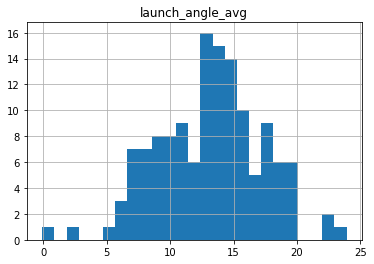

In [7]:
data_2019.hist(column='launch_angle_avg', bins = 25)

<AxesSubplot:>

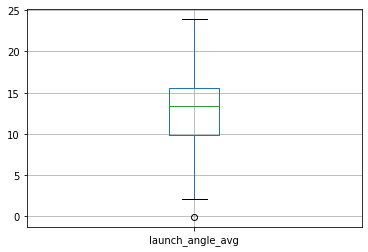

In [8]:
data_2019.boxplot(column='launch_angle_avg')

In [9]:
q0 = data_2019['launch_angle_avg'].quantile(0)
q1 = data_2019['launch_angle_avg'].quantile(0.25)
q2 = data_2019['launch_angle_avg'].quantile(0.5)
q3 = data_2019['launch_angle_avg'].quantile(0.75)
q4 = data_2019['launch_angle_avg'].quantile(1)
print('{}\n{}\n{}\n{}\n{}'.format(q0, q1, q2, q3, q4))

-0.1
9.850000000000001
13.4
15.55
23.9


In [10]:
dummies = [None]*data_2019['launch_angle_avg'].size
#bools = []
bools = data_2019['launch_angle_avg'].between(q0, q1)
print(bools)

0      False
1      False
2      False
3       True
4      False
       ...  
130    False
131    False
132    False
133    False
134    False
Name: launch_angle_avg, Length: 135, dtype: bool


In [11]:
n = 0
for i in range(bools.size):
    if(bools[i] == True):
        dummies[i]= 1
        n = n + 1
print(n)

34


In [12]:
bools = data_2019['launch_angle_avg'].between(q1, q2)
n = 0
for i in range(bools.size):
    if(bools[i] == True):
        dummies[i]= 2
        n = n + 1
print(n)

34


In [13]:
bools = data_2019['launch_angle_avg'].between(q2, q3)
n = 0
for i in range(bools.size):
    if(bools[i] == True):
        dummies[i]= 3
        n = n + 1
print(n)

34


In [14]:
bools = data_2019['launch_angle_avg'].between(q3, q4)
n = 0
for i in range(bools.size):
    if(bools[i] == True):
        dummies[i]= 4
        n = n + 1
print(n)

34


In [15]:
print(dummies)

[2, 3, 2, 1, 2, 4, 3, 1, 2, 1, 1, 1, 4, 1, 2, 4, 4, 4, 4, 3, 2, 1, 2, 1, 4, 4, 3, 2, 1, 3, 3, 2, 4, 1, 4, 1, 2, 2, 4, 2, 2, 4, 3, 4, 1, 2, 2, 3, 3, 1, 1, 3, 3, 1, 3, 4, 1, 3, 3, 1, 2, 4, 1, 1, 1, 3, 4, 3, 1, 2, 3, 2, 1, 2, 1, 2, 1, 3, 4, 4, 2, 2, 4, 3, 1, 4, 4, 4, 3, 3, 1, 3, 4, 3, 3, 2, 4, 1, 3, 4, 4, 1, 1, 2, 4, 1, 4, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1, 3, 2, 2, 4, 4, 3, 4, 4, 4, 2, 2, 1, 4, 2, 3, 3, 2, 2]


In [16]:
def launch_angle_avg_quartile(n):
    if(n >= q0 and n <= q1):
        return 1
    if(n >= q1 and n <=q2):
        return 2
    if(n >= q2 and n <= q3):
        return 3
    if(n >= q3 and n <= q4):
        return 4

In [17]:
test = map(launch_angle_avg_quartile, data_2019['launch_angle_avg'])
test_list = list(test)
print(type(bools))

<class 'pandas.core.series.Series'>


In [18]:
data_2019['launch_quartile'] = dummies
data_2019.head()

,last_name,first_name,year,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,...,n_bolts,hp_to_1b,sprint_speed,OPS_Plus_Name,OPS_Plus,UBR_Name,UBR,wRC_Plus_Name,wRC_Plus,launch_quartile
0,Abreu,Jose,2019,0.282,0.522,0.363,0.335,0.240,92.1,10.9,...,0,4.47,26.6,Abreu\abreujo02,118.0,Abreu,-3.0,Abreu,117,2
1,Acuna Jr.,Ronald,2019,0.282,0.578,0.393,0.368,0.296,90.6,14.2,...,47,4.18,29.4,Acuna Jr.\acunaro01,121.0,Acuna Jr.,4.6,Acuna Jr.,126,3
2,Adames,Willy,2019,0.254,0.446,0.326,0.317,0.192,88.5,10.8,...,0,4.27,28.3,Adames\adamewi01,96.0,Adames,1.8,Adames,97,2
3,Ahmed,Nick,2019,0.261,0.432,0.326,0.327,0.171,87.8,7.6,...,2,4.35,28.2,Ahmed\ahmedni01,92.0,Ahmed,2.4,Ahmed,91,1
4,Alberto,Hanser,2019,0.283,0.401,0.308,0.309,0.119,84.4,11.8,...,0,4.33,26.8,Alberto\alberha01,98.0,Alberto,-0.2,Alberto,96,2


In [19]:
wRC_model = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model.coef_[0][0], wRC_model.score(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])))

KeyError: "None of [Index(['launch_quartile'], dtype='object')] are in the [columns]"

In [ ]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2019);

In [ ]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 1]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 2]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 4]);

In [ ]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2019[data_2019['launch_quartile'] == 3]);

# 2018

In [ ]:
data_2018 = data_2018.head(139)
data_2018.hist(column='launch_angle_avg', bins = 25)

<AxesSubplot:>

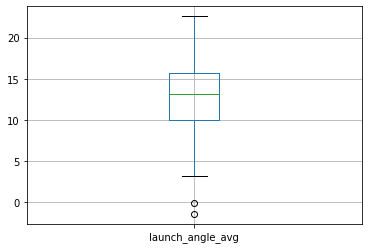

In [24]:
data_2018.boxplot(column='launch_angle_avg')

In [25]:
q0 = data_2018['launch_angle_avg'].quantile(0)
q1 = data_2018['launch_angle_avg'].quantile(0.25)
q2 = data_2018['launch_angle_avg'].quantile(0.5)
q3 = data_2018['launch_angle_avg'].quantile(0.75)
q4 = data_2018['launch_angle_avg'].quantile(1)

In [26]:
dummy_2018 = map(launch_angle_avg_quartile, data_2018['launch_angle_avg'])


In [27]:
print(list(data_2018['launch_angle_avg']))

[12.2, 16.2, 11.9, 16.1, 15.7, 10.1, 8.7, 10.8, 12.2, 15.4, 9.6, 12.4, 9.5, 16.2, 12.8, 18.4, 12.0, 12.5, 12.3, 9.5, 16.8, 14.6, 4.9, 12.1, 12.6, 15.0, 21.6, 15.2, 8.2, 14.8, 6.1, 12.3, 8.0, 11.3, 15.2, 12.8, 15.1, 18.0, -0.1, 15.2, 15.7, 17.6, 4.8, 18.0, 10.6, 18.9, 14.5, 21.9, 13.7, 9.4, 14.0, 15.7, 11.4, 11.0, 5.8, 14.2, 16.0, 11.5, 15.4, 12.7, 14.4, 12.3, 11.5, 16.9, 13.2, 13.2, 22.6, -1.4, 10.8, 4.2, 13.2, 15.8, 16.2, 17.7, 17.8, 5.9, 14.7, 13.4, 17.4, 14.4, 5.2, 11.5, 10.0, 5.8, 8.7, 10.6, 8.1, 14.1, 4.5, 5.3, 13.4, 16.9, 15.4, 15.4, 19.9, 10.7, 13.9, 18.0, 10.7, 6.7, 15.0, 18.1, 6.6, 16.8, 13.1, 20.1, 12.4, 19.0, 14.5, 17.9, 14.7, 9.4, 7.8, 17.9, 9.3, 15.4, 12.3, 18.5, 7.8, 15.4, 16.9, 7.7, 3.7, 15.0, 14.1, 9.5, 11.7, 16.0, 14.7, 14.1, 16.4, 18.6, 9.3, 11.9, 3.2, 13.4, 10.7, 5.0, 9.0]


In [28]:
data_2018['launch_quartile'] = list(dummy_2018)

In [43]:
wRC_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018.coef_[0][0], wRC_model_2018.score(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])))

Predictor: launch angle
Regression Slope: 3.885254194418684
R-squared: 0.03520633373651294



In [ ]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2018);

In [48]:
wRC_model_2018 = LinearRegression().fit(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018.coef_[0][0], wRC_model_2018.score(data_2018[['launch_quartile']], data_2018[['wRC_Plus']])))

Predictor: launch angle
Regression Slope: 3.885254194418684
R-squared: 0.03520633373651294



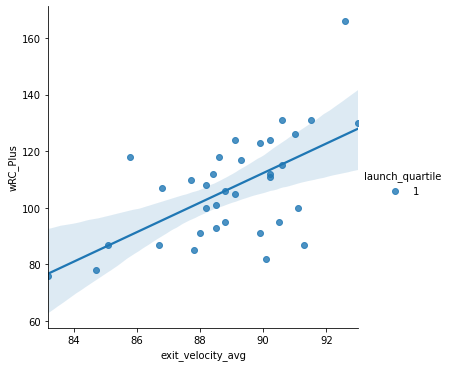

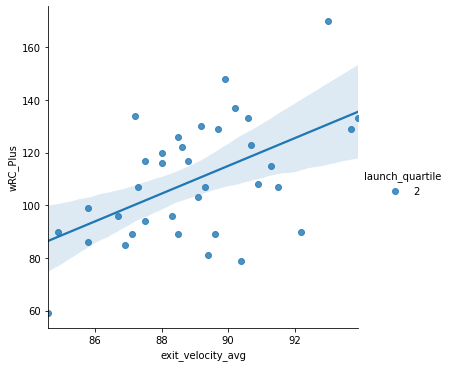

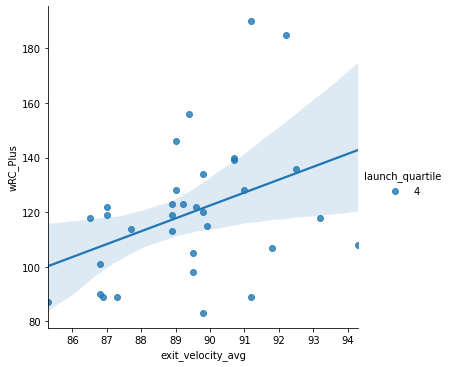

In [49]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 1]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 2]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 4]);

# This graph actually looks promising, could it shows that exit velocity only increases with certain launch angles (3rd quartile)

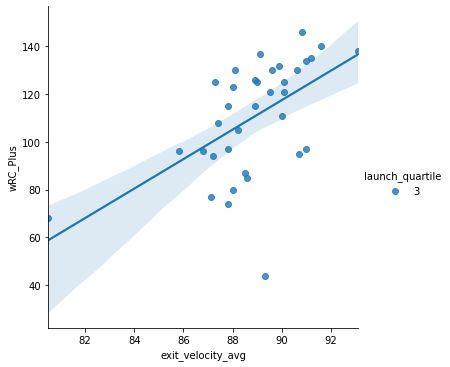

In [50]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2018[data_2018['launch_quartile'] == 3]);

In [51]:
data_2018[data_2018['launch_quartile'] == 3]

,last_name,first_name,year,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,...,n_bolts,hp_to_1b,sprint_speed,OPS_Plus_Name,OPS_Plus,UBR_Name,UBR,wRC_Plus_Name,wRC_Plus,launch_quartile
4,Alonso,Yonder,2018.0,0.258,0.451,0.338,0.326,0.193,87.8,15.7,...,0.0,4.95,23.3,Yonder Alonso*\alonsyo01,98.0,Alonso,-1.4,Alonso,97.0,3
9,Arenado,Nolan,2018.0,0.267,0.476,0.355,0.350,0.210,89.9,15.4,...,0.0,4.57,25.7,Nolan Arenado\arenano01,133.0,Arenado,1.2,Arenado,132.0,3
21,Cabrera,Asdrubal,2018.0,0.256,0.446,0.330,0.311,0.190,90.0,14.6,...,0.0,4.63,25.4,Asdrubal Cabrera#\cabreas01,111.0,Cabrera,1.0,Cabrera,111.0,3
25,Candelario,Jeimer,2018.0,0.209,0.352,0.295,0.304,0.143,87.2,15.0,...,0.0,4.41,27.3,Jeimer Candelario#\candeje01,91.0,Candelario,1.3,Candelario,94.0,3
27,Castellanos,Nick,2018.0,0.299,0.535,0.381,0.356,0.236,89.6,15.2,...,0.0,4.29,27.7,Nicholas Castellanos\casteni01,128.0,Castellanos,1.6,Castellanos,130.0,3
29,Chapman,Matt,2018.0,0.260,0.440,0.343,0.341,0.180,93.1,14.8,...,6.0,4.37,28.3,Matt Chapman\chapmma01,137.0,Chapman,5.4,Chapman,138.0,3
34,Cron,C.J.,2018.0,0.251,0.485,0.348,0.322,0.234,88.0,15.2,...,0.0,4.58,26.3,C.J. Cron\croncj01,123.0,Cron,-0.9,Cron,123.0,3
36,Davis,Chris,2018.0,0.191,0.363,0.278,0.266,0.172,89.3,15.1,...,0.0,4.65,25.5,Chris Davis*\davisch02,49.0,Davis,-3.1,Davis,44.0,3
39,Dickerson,Corey,2018.0,0.292,0.461,0.340,0.325,0.169,87.8,15.2,...,0.0,4.22,27.8,Corey Dickerson*\dickeco01,119.0,Dickerson,-1.4,Dickerson,115.0,3
40,Dietrich,Derek,2018.0,0.242,0.390,0.310,0.310,0.148,87.4,15.7,...,0.0,4.32,26.9,Derek Dietrich*\dietrde01,107.0,Dietrich,-1.8,Dietrich,108.0,3


In [52]:
wRC_model_2018_test = LinearRegression().fit(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2018_test.coef_[0], wRC_model_2018_test.score(data_2018[data_2018['launch_quartile'] == 3][['exit_velocity_avg']], data_2018[data_2018['launch_quartile'] == 3]['wRC_Plus'])))

Predictor: launch angle
Regression Slope: 6.179710028836911
R-squared: 0.3029750723719338



# 2017

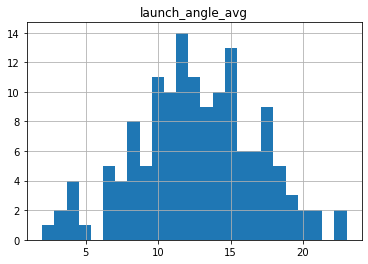

In [53]:
data_2017.hist(column='launch_angle_avg', bins = 25);

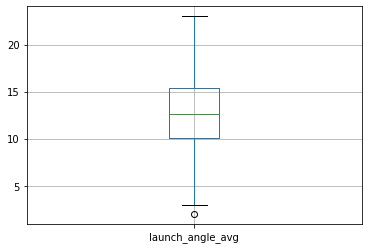

In [54]:
boxplot_2017 = data_2017.boxplot(column='launch_angle_avg');

In [55]:
q0 = data_2017['launch_angle_avg'].quantile(0)
q1 = data_2017['launch_angle_avg'].quantile(0.25)
q2 = data_2017['launch_angle_avg'].quantile(0.5)
q3 = data_2017['launch_angle_avg'].quantile(0.75)
q4 = data_2017['launch_angle_avg'].quantile(1)

dummy_2017 = map(launch_angle_avg_quartile, data_2017['launch_angle_avg'])
data_2017['launch_quartile'] = list(dummy_2017)
data_2017.head()
wRC_model_2017 = LinearRegression().fit(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2017.coef_[0][0], wRC_model_2017.score(data_2017[['launch_quartile']], data_2017[['wRC_Plus']])))

Predictor: launch angle
Regression Slope: 4.163613975681083
R-squared: 0.040187167377598976



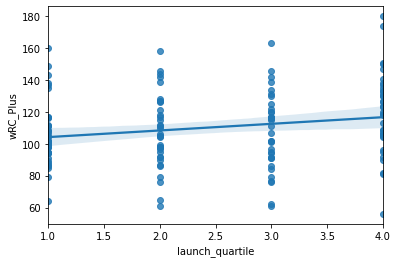

In [56]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2017);

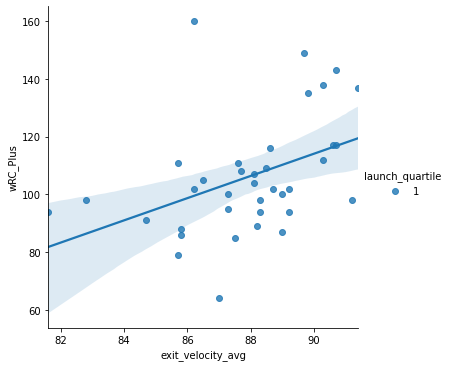

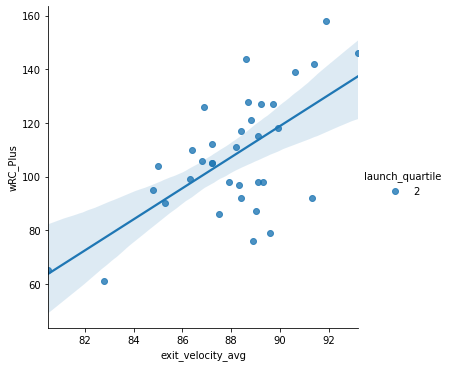

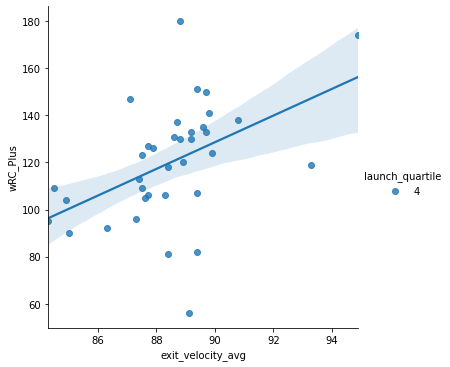

In [57]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 1]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 2]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 4]);

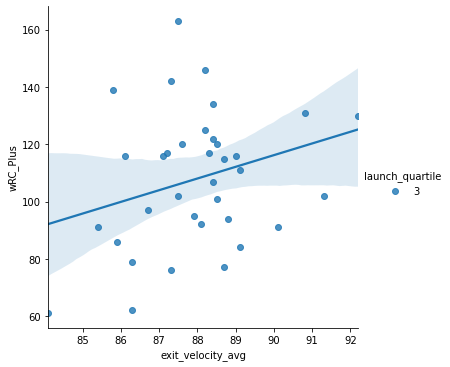

In [58]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2017[data_2017['launch_quartile'] == 3]);

# 2016

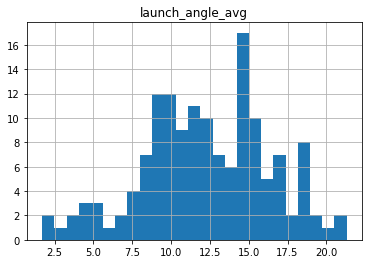

In [59]:
data_2016.hist(column='launch_angle_avg', bins = 25);

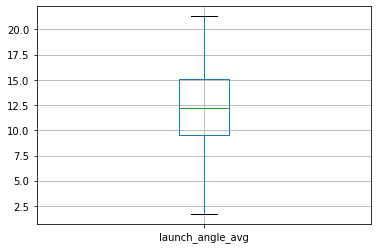

In [60]:
data_2016.boxplot(column='launch_angle_avg');

In [63]:
q0 = data_2016['launch_angle_avg'].quantile(0)
q05 = data_2016['launch_angle_avg'].quantile(0.125)
q1 = data_2016['launch_angle_avg'].quantile(0.25)
q15 = data_2016['launch_angle_avg'].quantile(0.375)
q2 = data_2016['launch_angle_avg'].quantile(0.5)
q25 = data_2016['launch_angle_avg'].quantile(0.625)
q3 = data_2016['launch_angle_avg'].quantile(0.75)
q35 = data_2016['launch_angle_avg'].quantile(0.875)
q4 = data_2016['launch_angle_avg'].quantile(1)

dummy_2016 = map(launch_angle_avg_quartile, data_2016['launch_angle_avg'])
data_2016['launch_quartile'] = list(dummy_2016)

wRC_model_2016 = LinearRegression().fit(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model_2016.coef_[0][0], wRC_model_2016.score(data_2016[['launch_quartile']], data_2016[['wRC_Plus']])))

Predictor: launch angle
Regression Slope: 4.24390243902439
R-squared: 0.05315623869002373



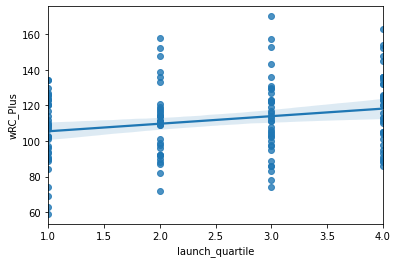

In [62]:
sns.regplot(x="launch_quartile", y="wRC_Plus", data=data_2016);

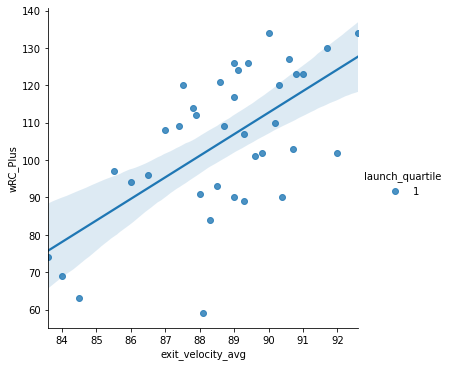

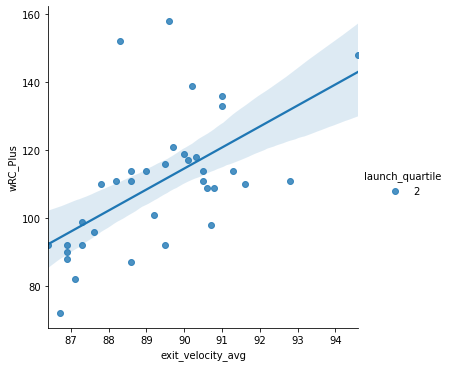

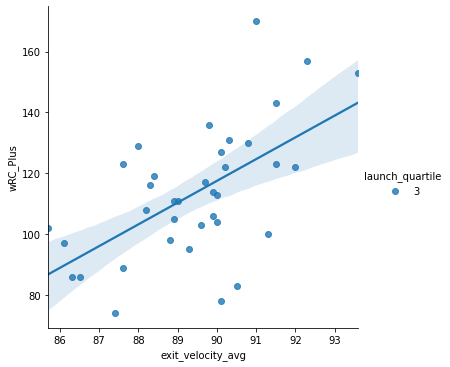

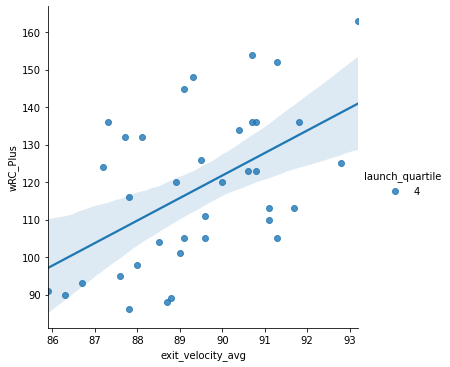

In [189]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 1]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 2]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 3]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_quartile', data=data_2016[data_2016['launch_quartile'] == 4]);

In [193]:
def launch_angle_avg_octile(n):
    if(n >= q0 and n <= q05):
        return 1
    if(n >= q05 and n <=q1):
        return 2
    if(n >= q1 and n <= q15):
        return 3
    if(n >= q15 and n <= q2):
        return 4
    if(n >= q2 and n <= q25):
        return 5
    if(n >= q25 and n <=q3):
        return 6
    if(n >= q3 and n <= q35):
        return 7
    if(n >= q35 and n <= q4):
        return 8

In [194]:
dummy_2016_octile = map(launch_angle_avg_octile, data_2016['launch_angle_avg'])
data_2016['launch_octile'] = list(dummy_2016_octile)

In [195]:
wRC_model_2016_oct = LinearRegression().fit(data_2016[['launch_octile']], data_2016[['wRC_Plus']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(wRC_model.coef_[0][0], wRC_model.score(data_2016[['launch_octile']], data_2016[['wRC_Plus']])))

Predictor: launch angle
Regression Slope: 3.885254194418684
R-squared: -0.1357221519317091



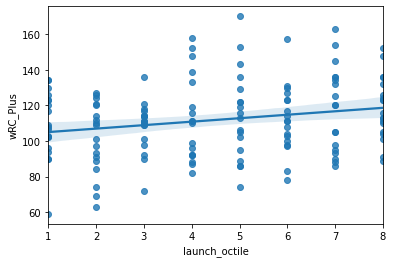

In [200]:
sns.regplot(x="launch_octile", y="wRC_Plus", data=data_2016);

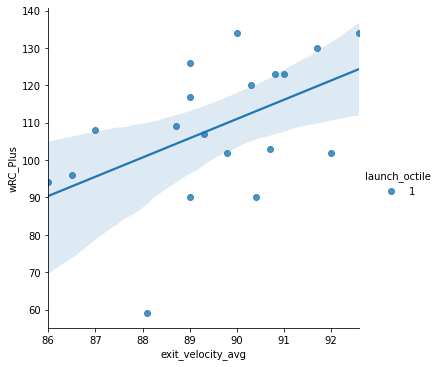

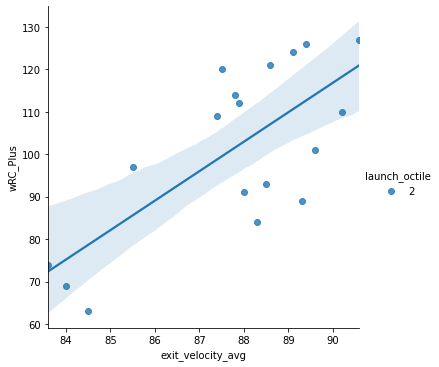

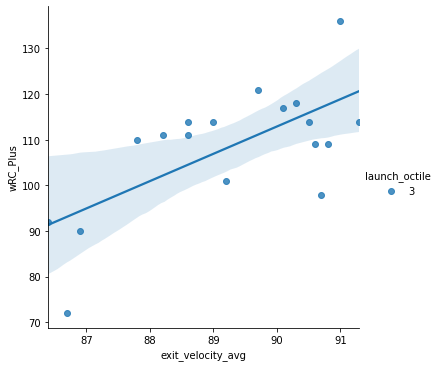

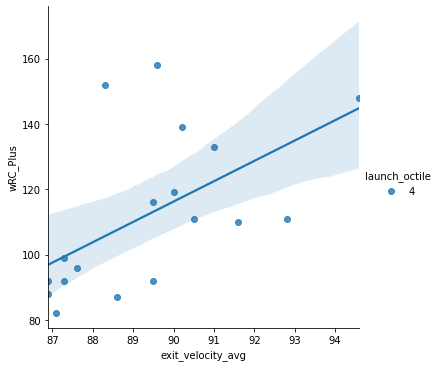

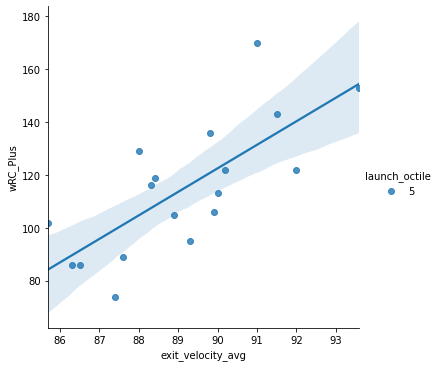

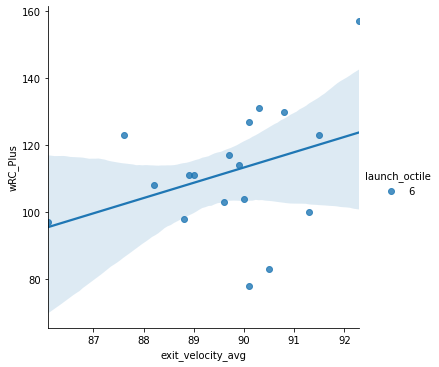

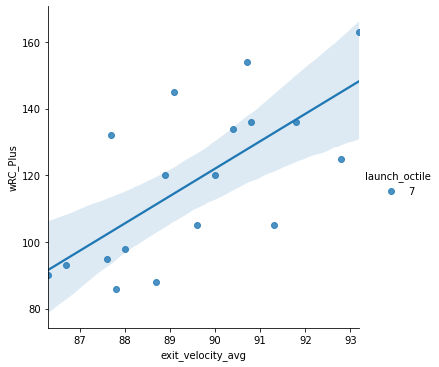

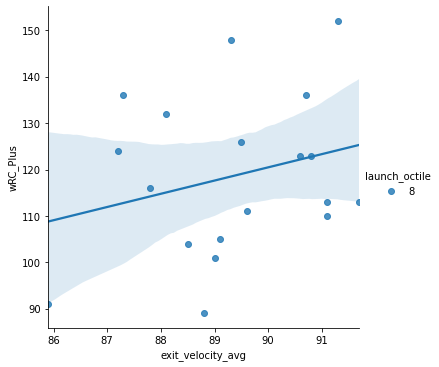

In [201]:
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 1]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 2]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 3]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 4]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 5]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 6]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 7]);
sns.lmplot(x="exit_velocity_avg", y="wRC_Plus", hue = 'launch_octile', data=data_2016[data_2016['launch_octile'] == 8]);

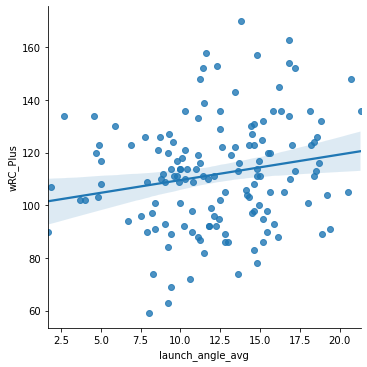

In [64]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016);

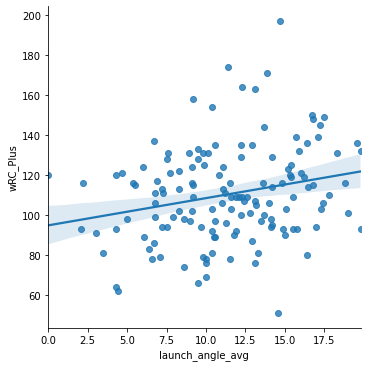

In [65]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2015);

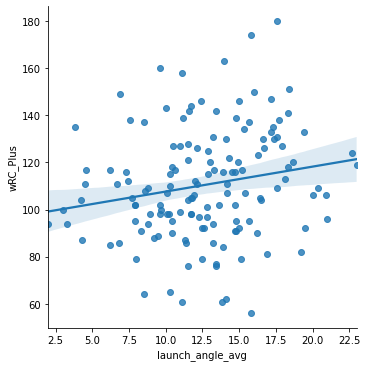

In [66]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2017);

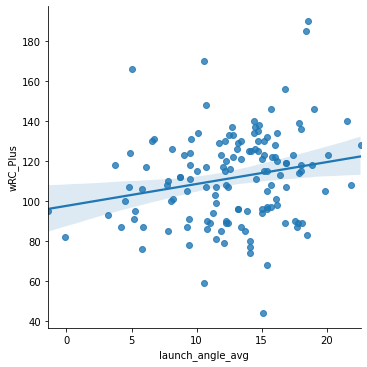

In [67]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018);

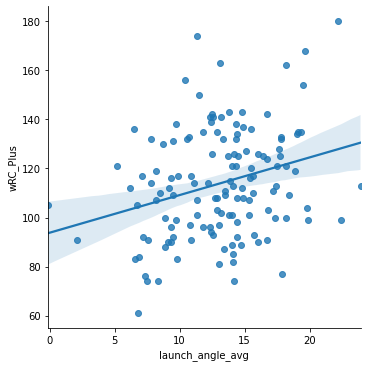

In [68]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019);

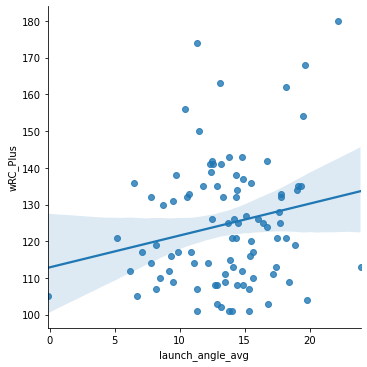

In [69]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2019['wRC_Plus'] > 100]);

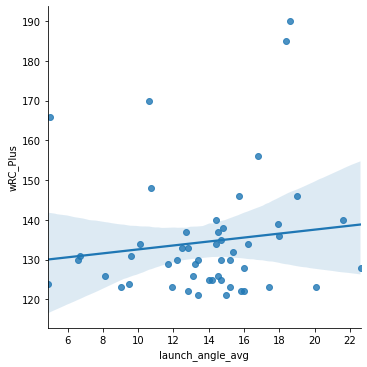

In [73]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2018[data_2018['wRC_Plus'] > 120]);

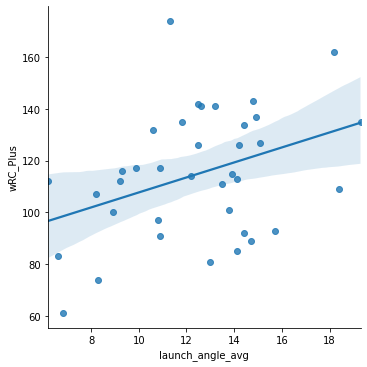

In [74]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2019[data_2017['wRC_Plus'] > 120]);

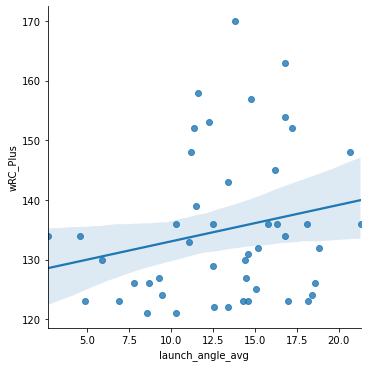

In [75]:
sns.lmplot(x="launch_angle_avg", y="wRC_Plus", data=data_2016[data_2016['wRC_Plus'] > 120]);

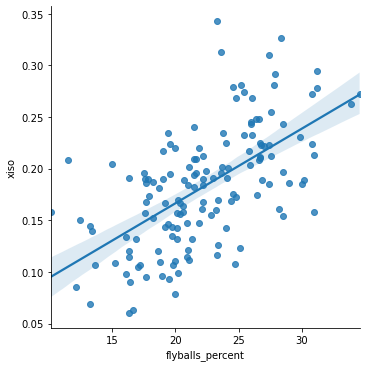

In [80]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2016);

In [82]:
flyballs_model_2016 = LinearRegression().fit(data_2016[['flyballs_percent']], data_2016[['xiso']])
print('Predictor: launch angle\nRegression Slope: {}\nR-squared: {}\n'.format(flyballs_model_2016.coef_[0][0], flyballs_model_2016.score(data_2016[['flyballs_percent']], data_2016[['xiso']])))

Predictor: launch angle
Regression Slope: 0.007212659476237146
R-squared: 0.3664535143326877



In [84]:
sns.lmplot(x="flyballs_percent", y="xiso", data=data_2016);

KeyError: "['Iso'] not in index"